# IBM Attrition Data Analysis 


All the imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix,roc_auc_score,plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from pycm import ConfusionMatrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import GaussianNB

Importing Dataset as pandas dataframe

In [2]:
df = pd.read_csv(r"C:\Users\amank\DMML CW\IBM.csv")
df.dataframeName = 'IBM.csv'
nRow, nCol = df.shape
print(f'{nRow} rows and {nCol} columns')

1470 rows and 35 columns


## Exploring the Dataset

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Checking for incomplete entries and datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no null or incomplete values

# Data Exploration 

In [6]:
categorical_data = df.select_dtypes('object')
categorical_data.keys()

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Therefore there are 9 features with non numeric values

Their values

In [7]:
for i in categorical_data.keys():
    print(i," : ",df[i].unique(),"\n")

Attrition  :  ['Yes' 'No'] 

BusinessTravel  :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department  :  ['Sales' 'Research & Development' 'Human Resources'] 

EducationField  :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender  :  ['Female' 'Male'] 

JobRole  :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus  :  ['Single' 'Married' 'Divorced'] 

Over18  :  ['Y'] 

OverTime  :  ['Yes' 'No'] 



In [8]:
df.columns[df.nunique() <= 1]

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

since the above features only have a single value, it is better to drop them

In [9]:
df.drop('EmployeeCount',axis =1,inplace=True)
df.drop('StandardHours',axis =1,inplace=True)
df.drop('Over18',axis =1,inplace=True)

We can also see EmployeeNumber which would also not help in any form of predicition so that can be dropped as well 

In [10]:
df.drop('EmployeeNumber',axis =1,inplace=True)

# Lets us explore the data with some visualization 

[]

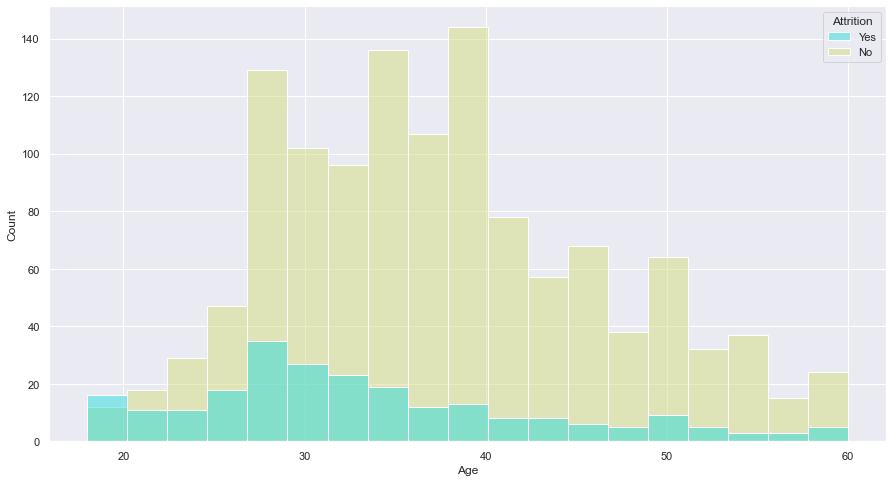

In [11]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data = df,
            x = "Age",
            hue = "Attrition",
            palette = "rainbow").set()

Here is a age 

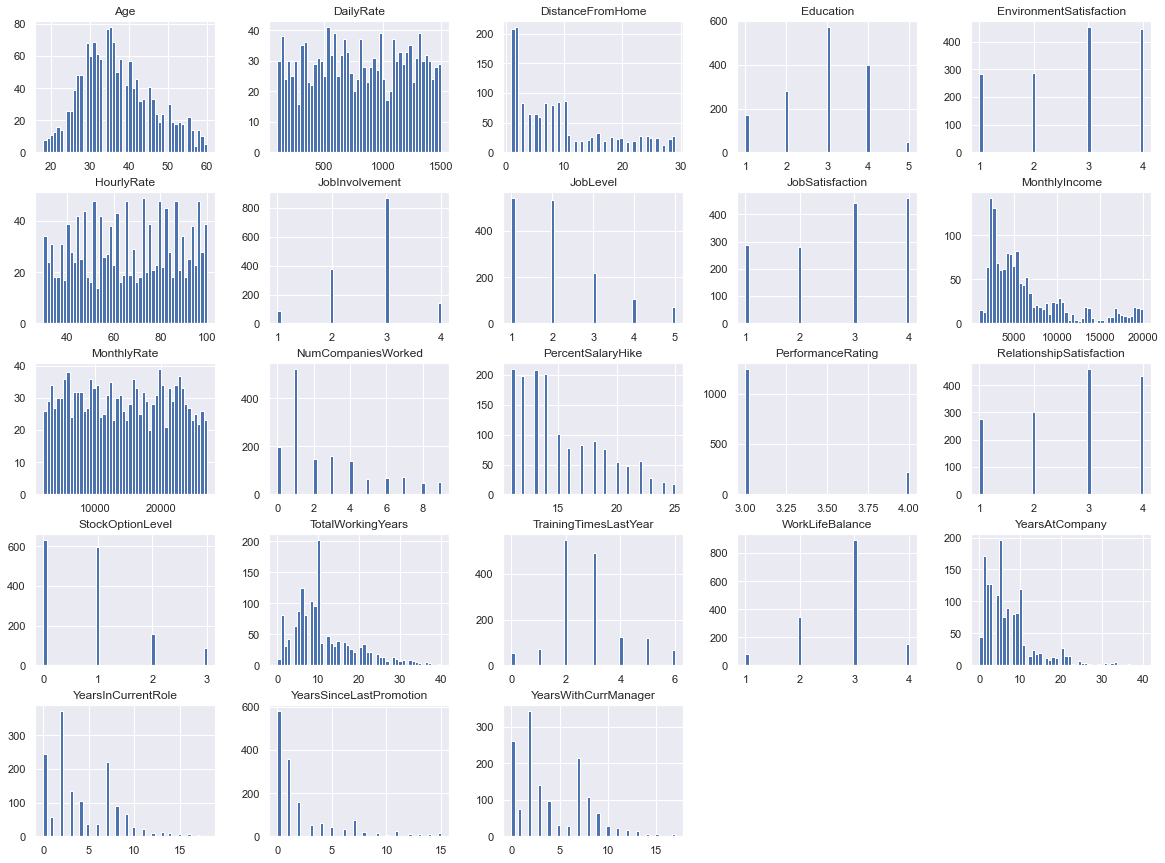

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
df.skew()

C:\Users\amank\AppData\Local\Temp/ipykernel_11148/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

There are no null entries in the dataset, but there are non numeric categorical data. 

Performing some analysis before encoding 

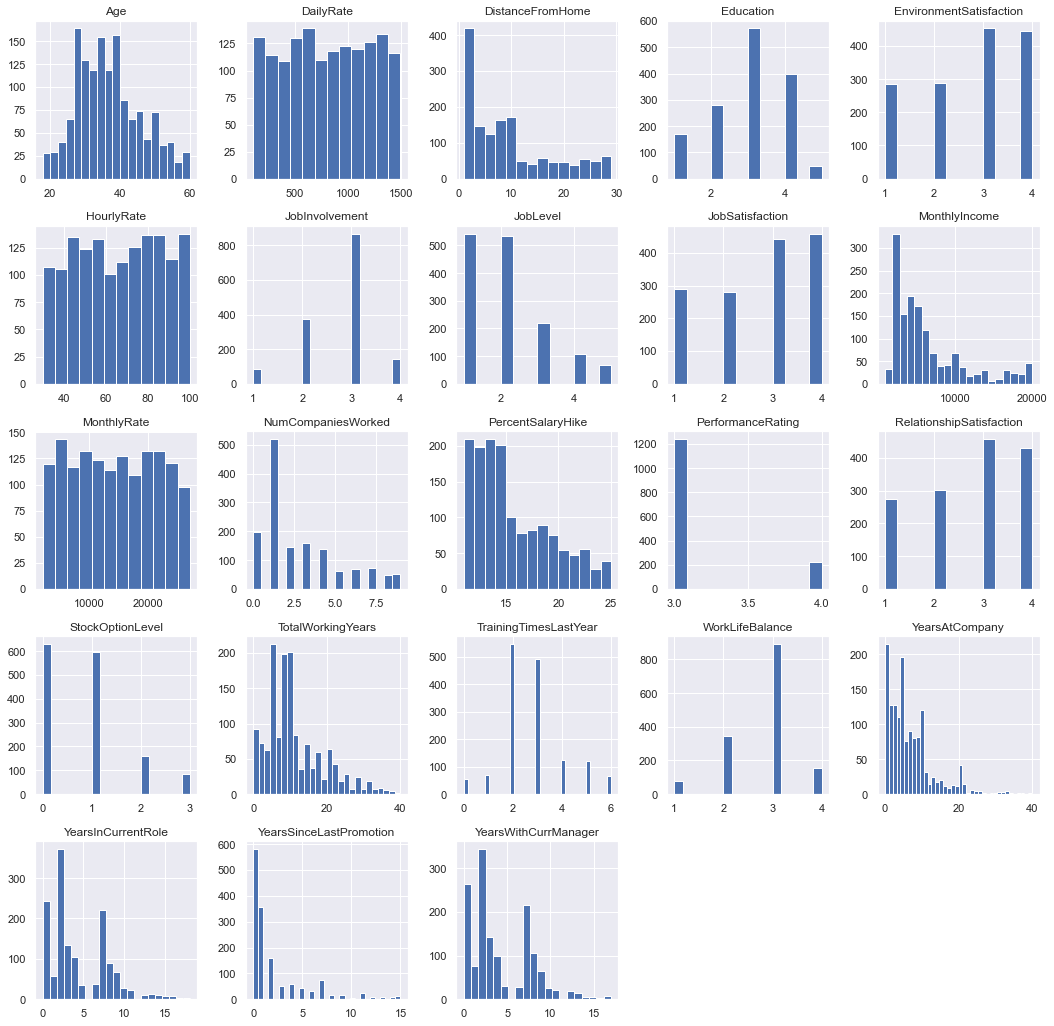

In [14]:
df.hist(figsize=(18,18),grid=True,bins='auto');

C:\Users\amank\AppData\Local\Temp/ipykernel_11148/2616233104.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for index in df.skew().index:
C:\Users\amank\AppData\Local\Temp/ipykernel_11148/2616233104.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if df.skew().loc[index]>0.5:


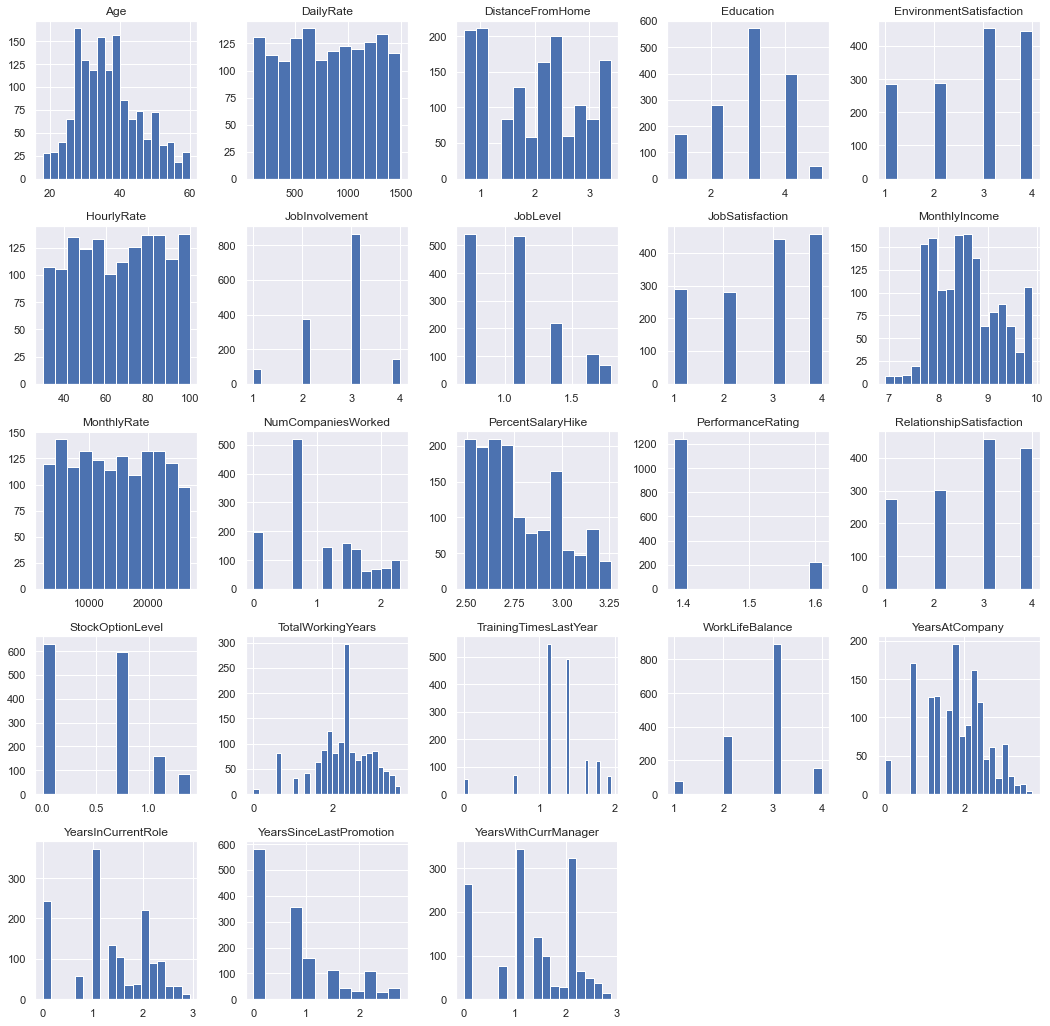

In [15]:
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])

df.hist(figsize=(18,18),grid=True,bins='auto');        

C:\Users\amank\AppData\Local\Temp/ipykernel_11148/273308012.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


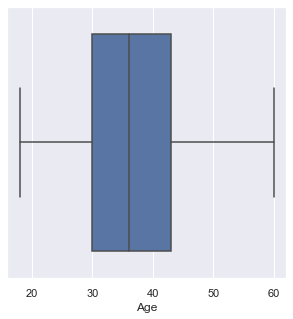

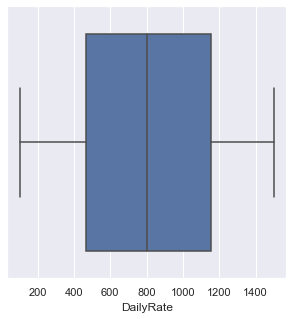

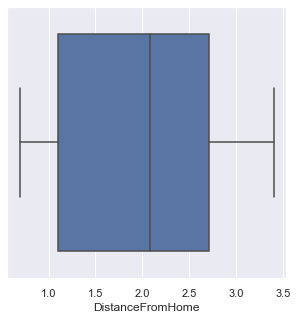

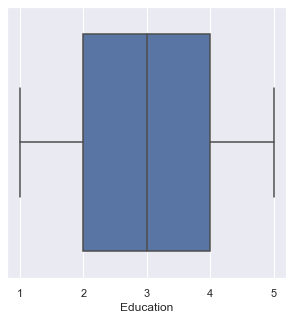

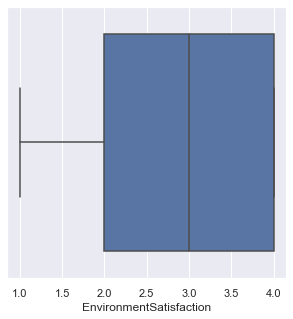

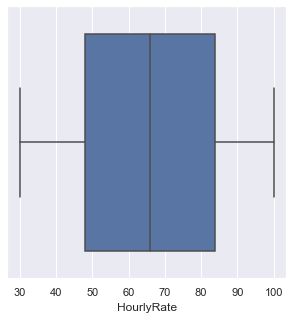

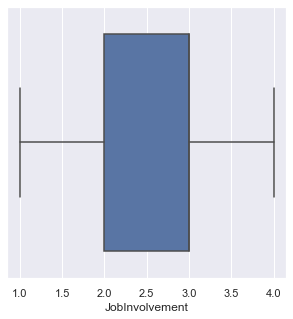

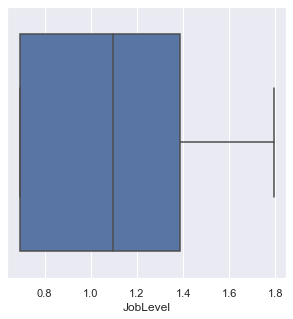

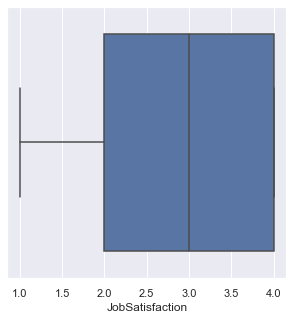

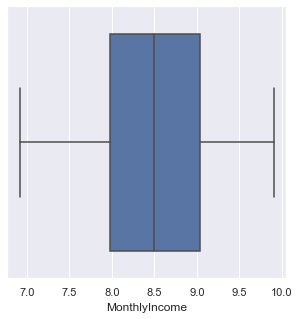

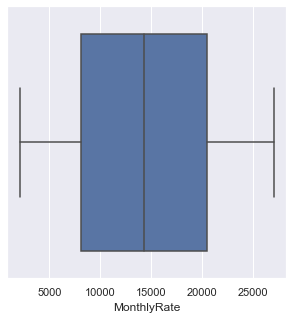

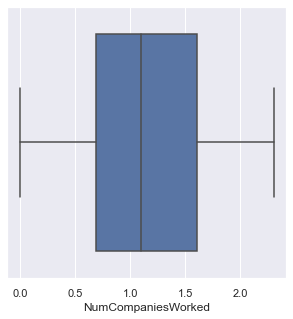

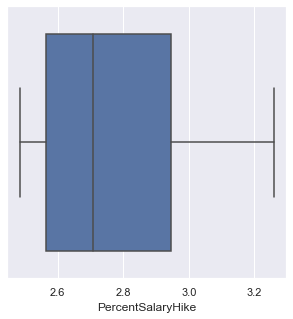

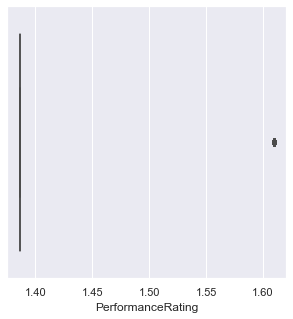

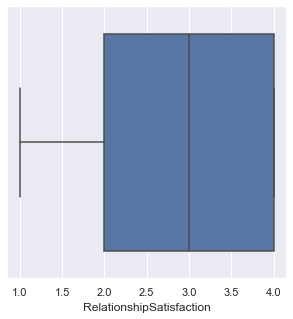

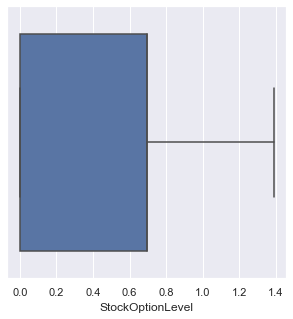

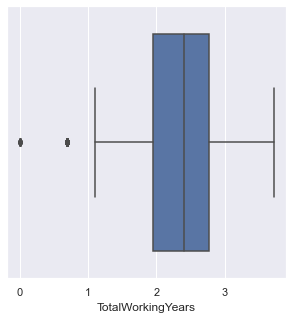

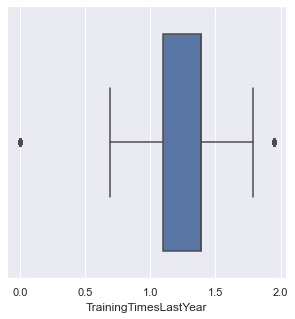

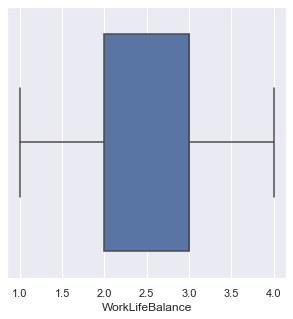

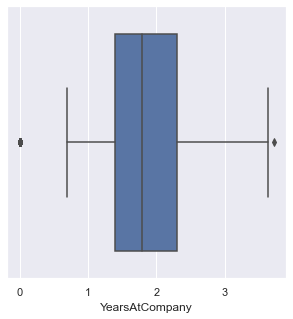

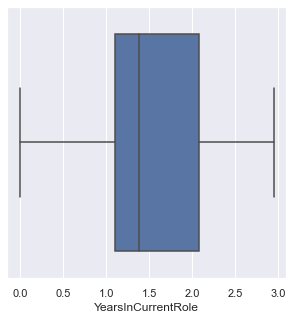

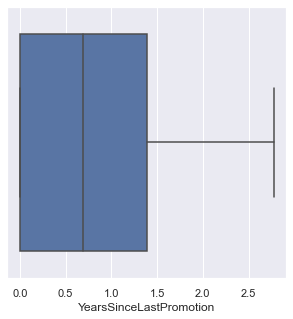

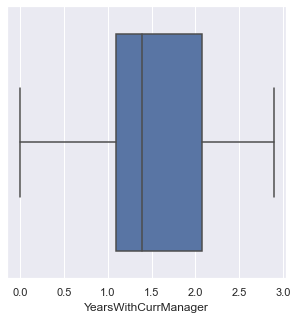

In [16]:

df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(5,5))
        sns.boxplot(data=df1, x=column)

## Outliers 

## Reference : https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

A function to find outlier 

In [17]:
def Find_outliers(feature):
    cols = []
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    threshold_lower = Q1 - 1.5 * IQR
    threshold_higher = Q3 + 1.5 * IQR
    for i in feature:
        if i > threshold_higher or i < threshold_lower:
            cols.append(i)
    return cols

In [18]:
col_outliers = []
for col in df.columns:
    if df[col].dtype == 'O' : continue
    else : 
        outliers = Find_outliers(df[col])
        if outliers != []:
            col_outliers.append(col)

constant_cols = col_outliers[1:4]
col_outliers[1:4] = []
col_outliers

col_outliers
        

['PerformanceRating']

C:\Users\amank\AppData\Local\Temp/ipykernel_11148/2349495245.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


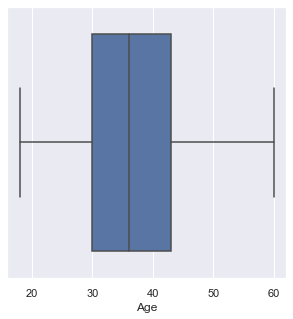

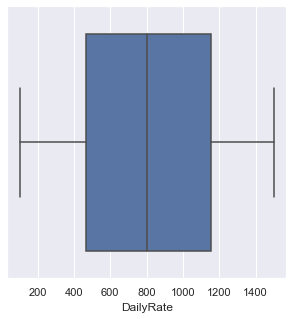

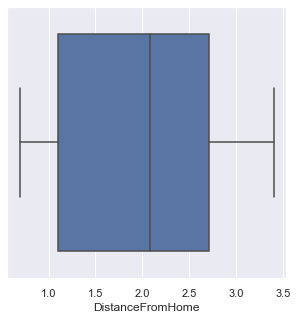

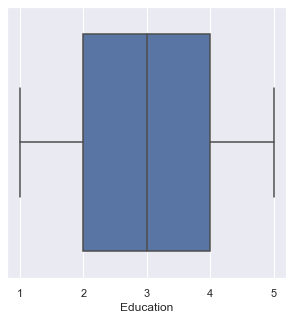

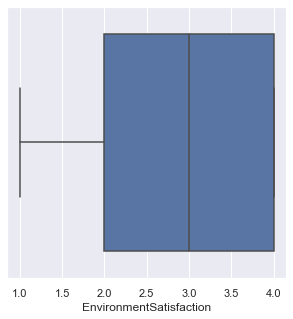

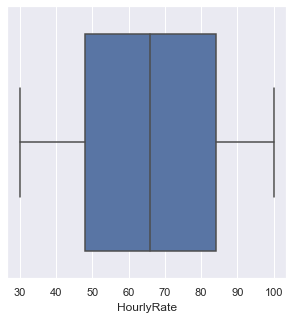

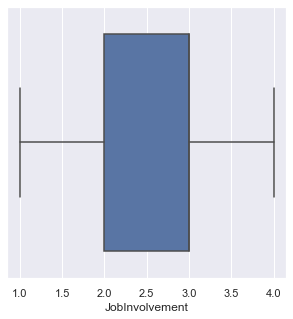

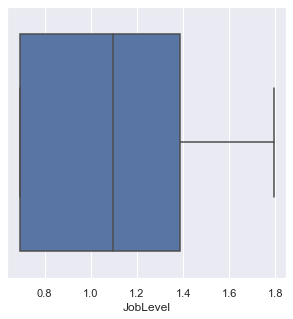

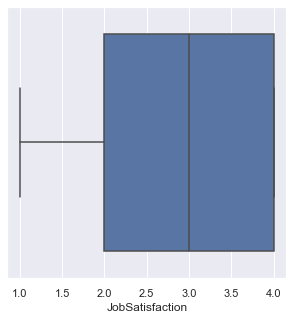

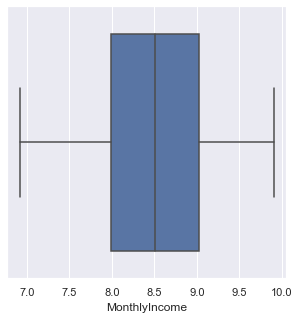

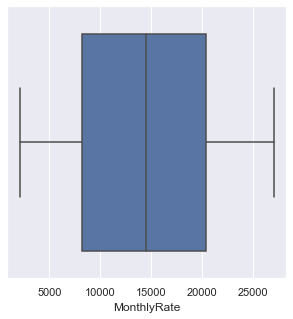

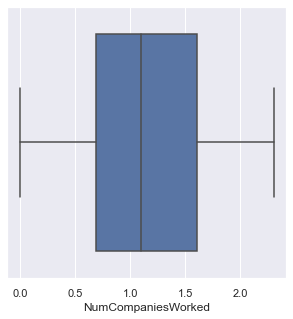

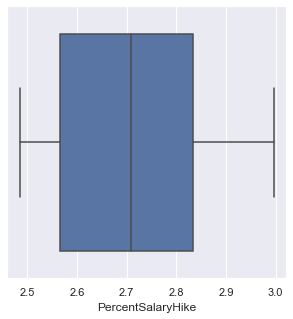

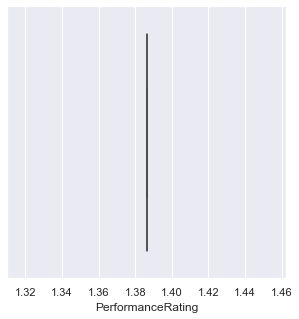

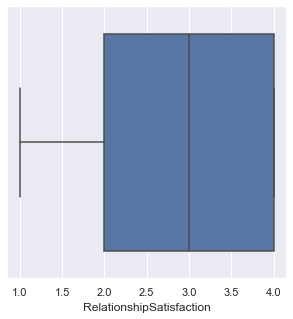

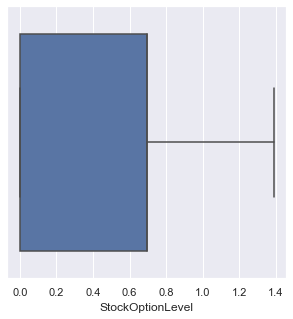

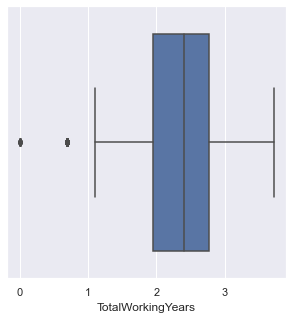

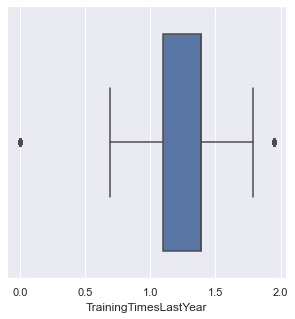

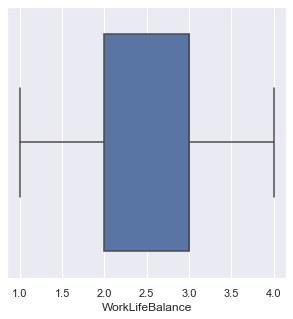

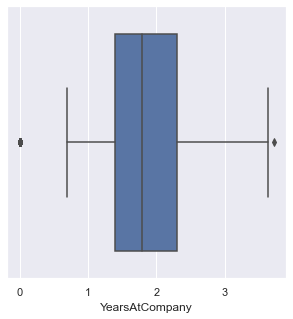

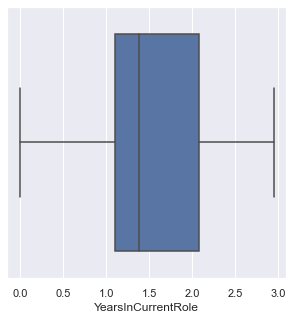

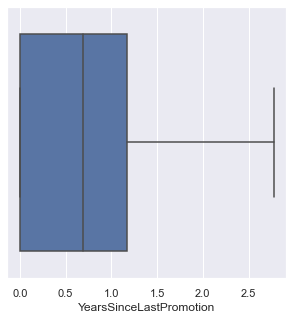

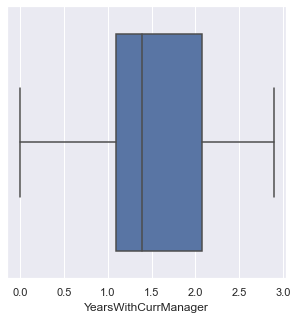

In [19]:
cols = col_outliers # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(5,5))
        sns.boxplot(data=df1, x=column)

In [20]:

# LE= LabelEncoder()
# df["Attrition"]=LE.fit_transform(df["Attrition"])
# df["BusinessTravel"]=LE.fit_transform(df["BusinessTravel"])
# df["Department"]=LE.fit_transform(df["Department"])
# df["EducationField"]=LE.fit_transform(df["EducationField"])
# df["Gender"]=LE.fit_transform(df["Gender"])
# df["JobRole"]=LE.fit_transform(df["JobRole"])
# df["MaritalStatus"]=LE.fit_transform(df["MaritalStatus"])
# df["OverTime"]=LE.fit_transform(df["OverTime"])



<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

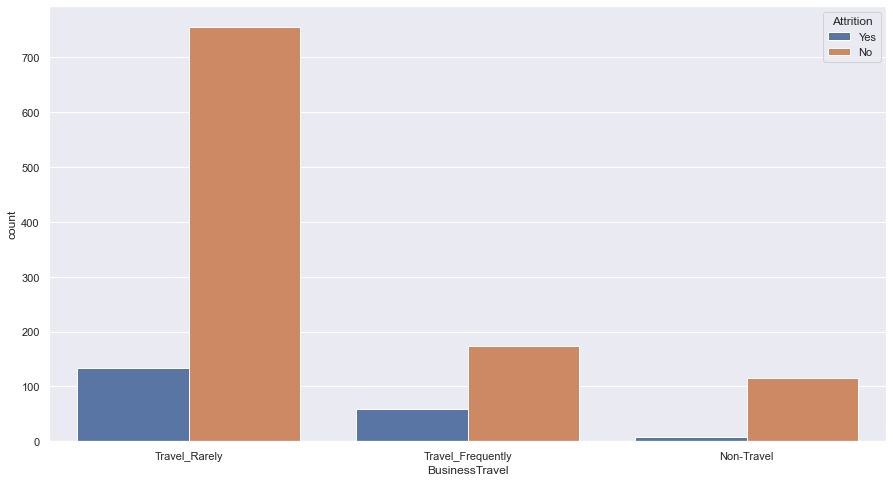

In [21]:
sns.countplot(x='BusinessTravel', data=df, hue="Attrition")

In [22]:
# sns.countplot(x='Gender', data=df[df['Attrition']=='Yes'], hue="Attrition")

From the above bar graph we can see that more male employees have left compared to female employees 

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

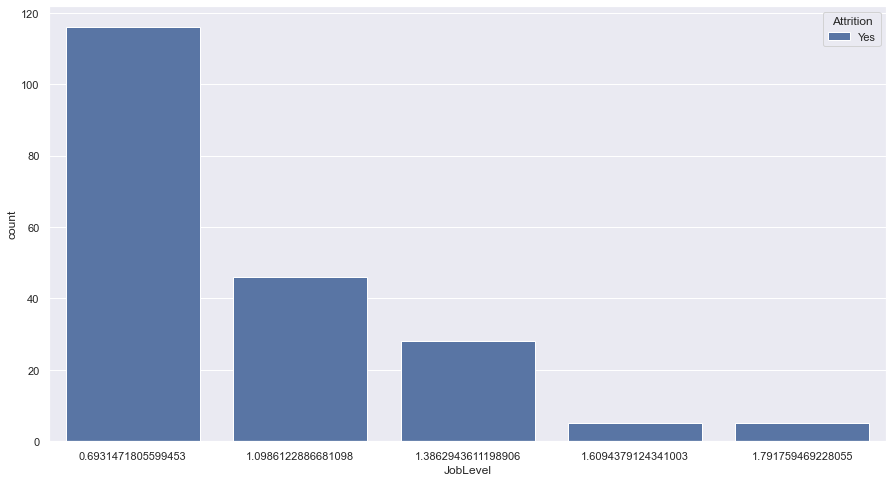

In [23]:
sns.countplot(x='JobLevel', data=df[df['Attrition']=='Yes'], hue="Attrition")

From the above bar graph we can see that people with low job level have left the company compared to people with high job level.

<AxesSubplot:xlabel='Department', ylabel='count'>

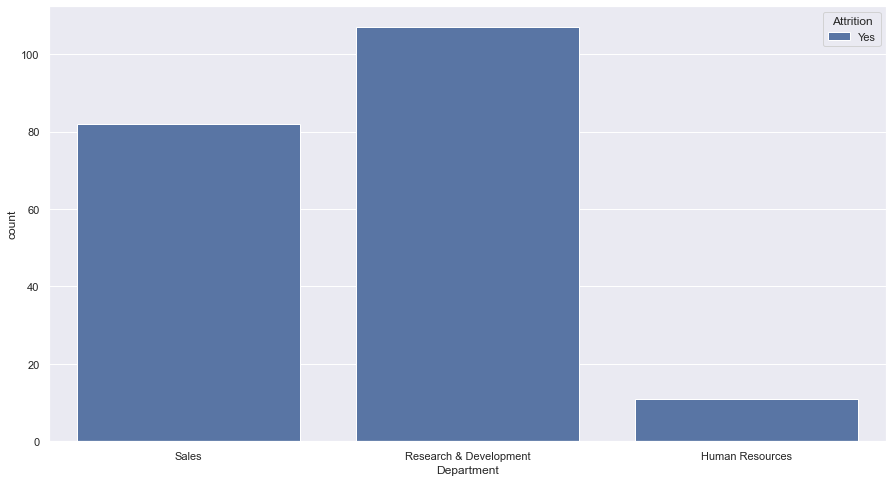

In [24]:
sns.countplot(x='Department', data=df[df['Attrition']=='Yes'], hue="Attrition")

And finally more people from research & development have left compared to other departments 

add more ?
Education

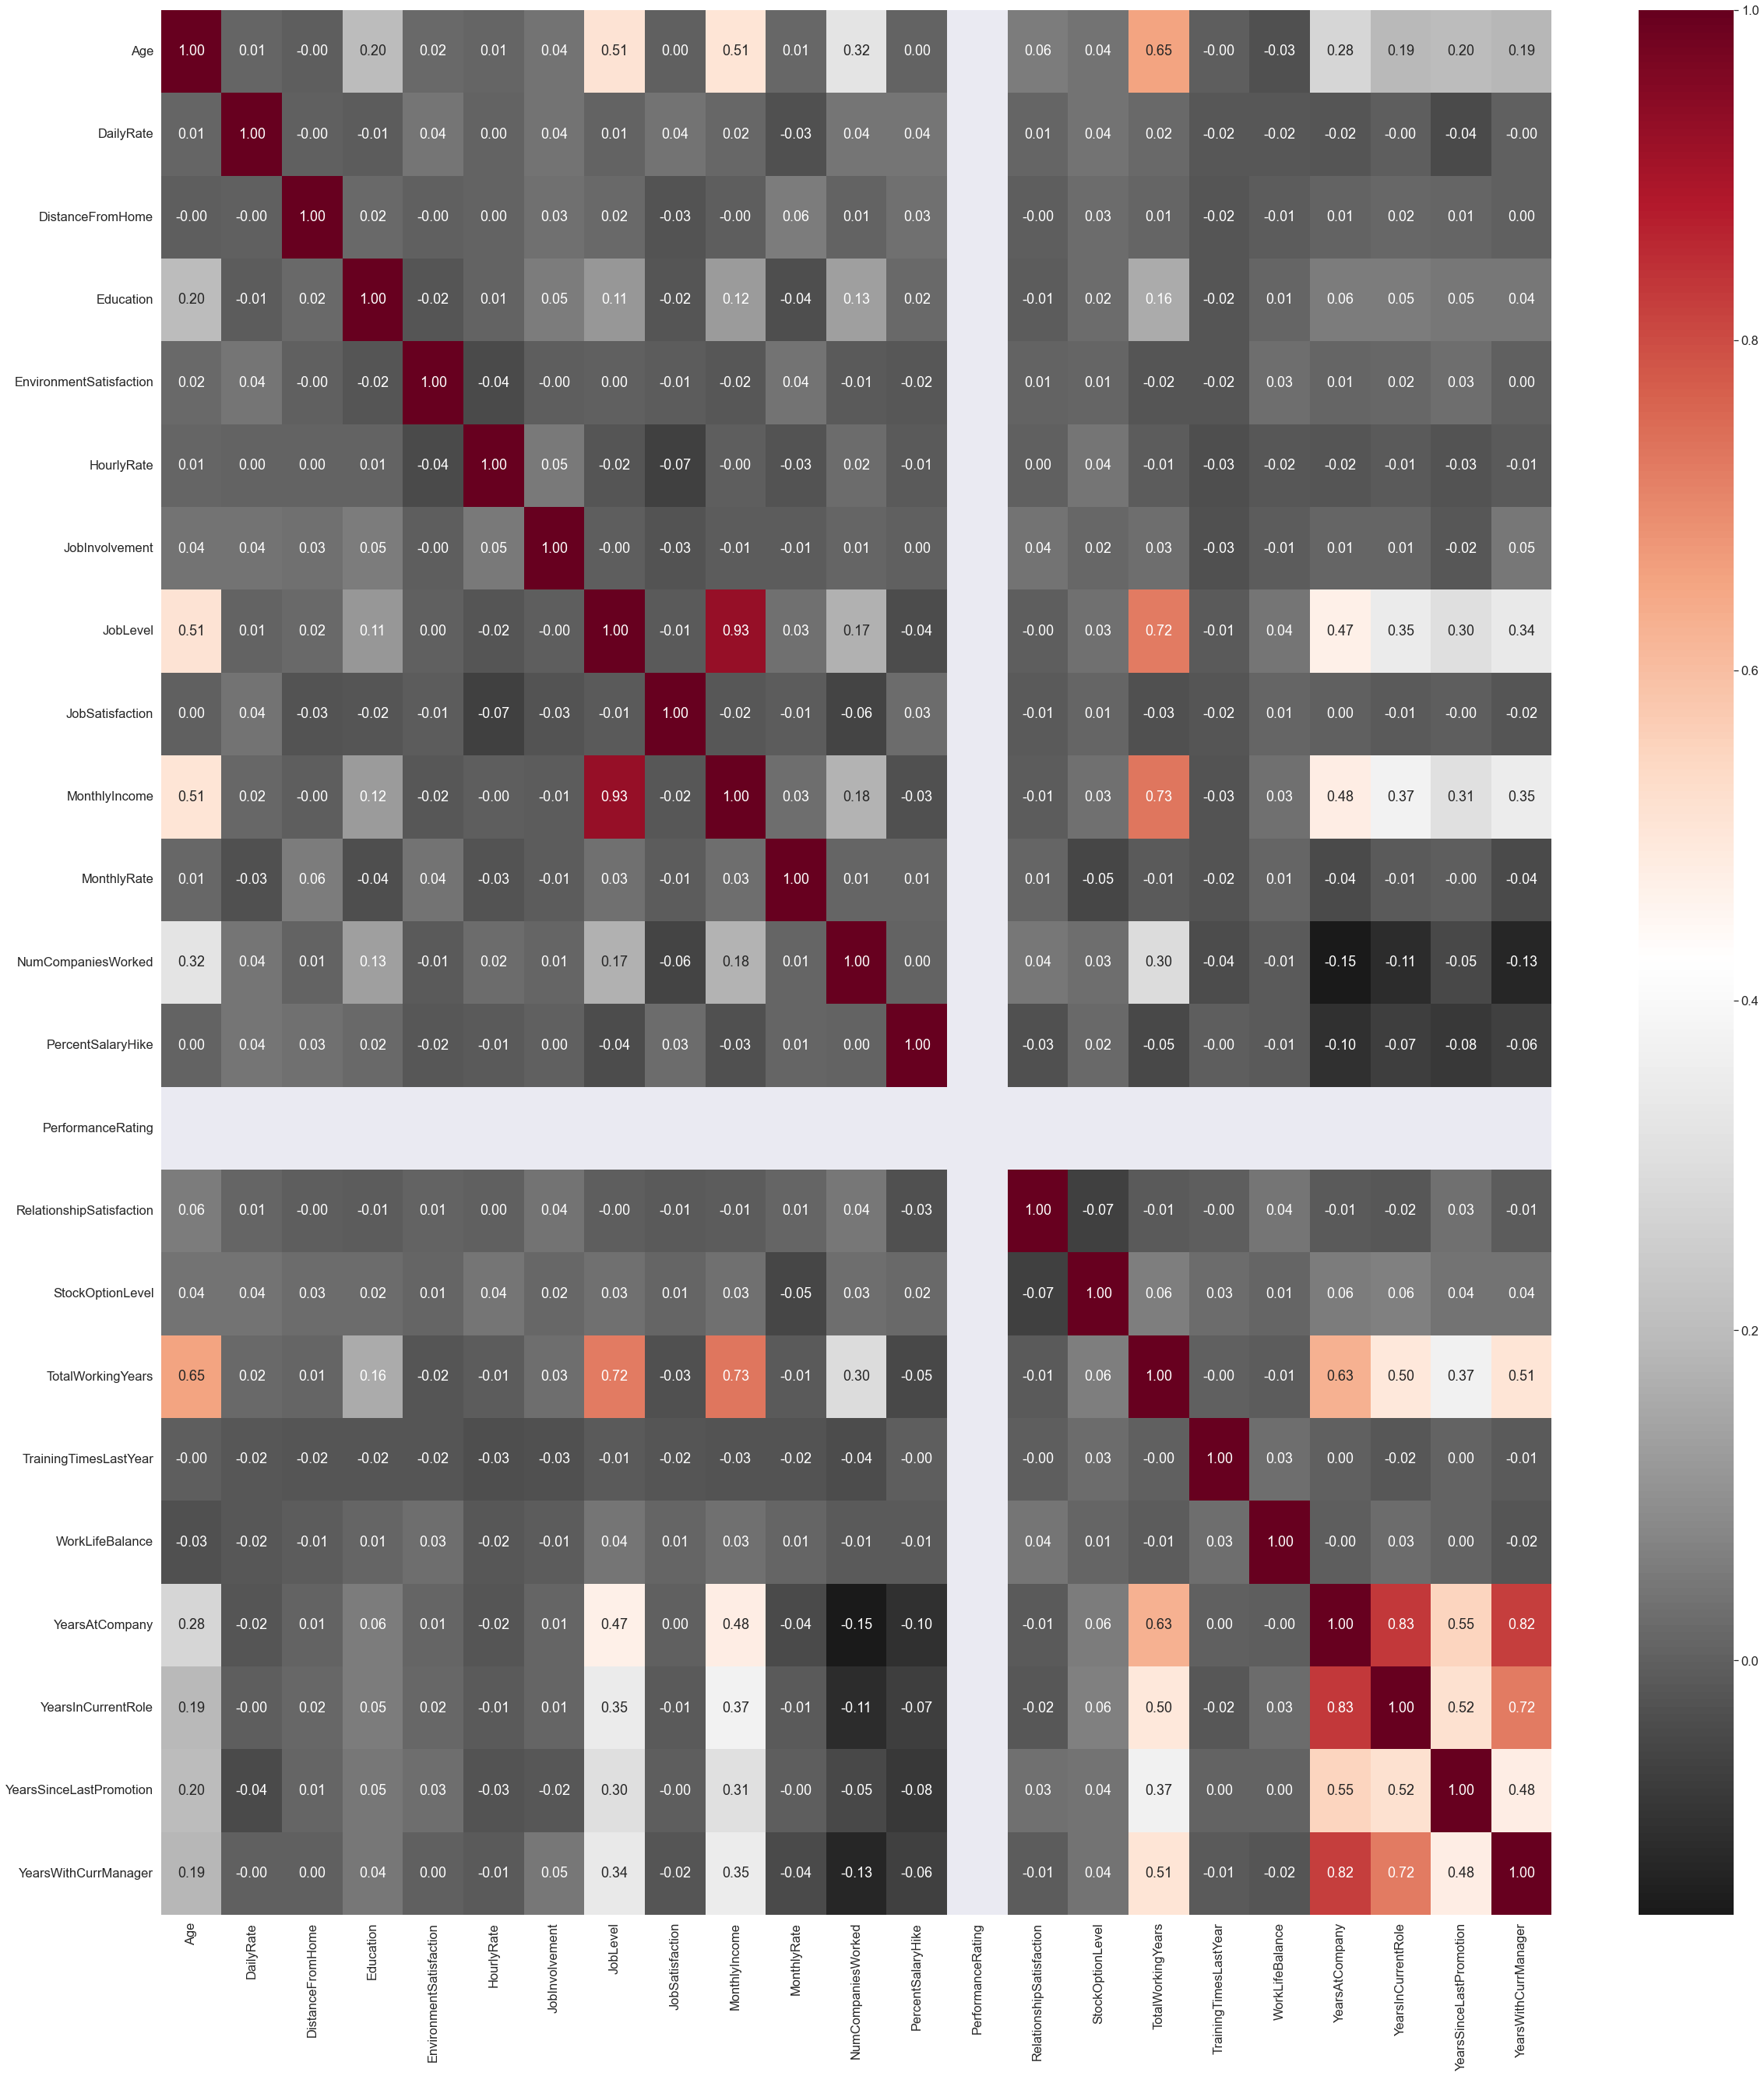

In [25]:
corr_matrix = df.corr()

plt.figure(figsize=(40,45))
sns.set(font_scale = 1.5)
sns.heatmap(corr_matrix, cmap='RdGy_r', annot=True, fmt='.2f')
plt.show()


Now before getting correlation matrix we must convert 

In [26]:
temp_df = df

temp_df.Attrition.replace({'Yes' : 1,'No' : 0,}, inplace = True)
corr_matrix = temp_df.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.058599
NumCompaniesWorked          0.049570
MonthlyRate                 0.018903
HourlyRate                  0.000433
YearsSinceLastPromotion    -0.031019
Education                  -0.033880
PercentSalaryHike          -0.036071
RelationshipSatisfaction   -0.043147
DailyRate                  -0.054466
TrainingTimesLastYear      -0.054662
JobSatisfaction            -0.077019
WorkLifeBalance            -0.077864
EnvironmentSatisfaction    -0.108631
JobInvolvement             -0.129409
StockOptionLevel           -0.147219
Age                        -0.152598
JobLevel                   -0.168741
YearsInCurrentRole         -0.180764
MonthlyIncome              -0.183284
YearsAtCompany             -0.184940
YearsWithCurrManager       -0.188461
TotalWorkingYears          -0.221856
PerformanceRating                NaN
Name: Attrition, dtype: float64

In [38]:


# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")


df.replace({'Yes':1,'No':0,'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 3,
'Sales' : 1, 'Research & Development' : 2, 'Human Resources' : 3}, inplace=True)
X = df.drop(['Attrition'],axis=1)

Y = df['Attrition']
# encoder.fit(X) 
X = pd.get_dummies(X)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, shuffle= True)


Gaussian Naive Bayes

reference : https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

In [40]:
GaussianNB_classifier = GaussianNB()
y_pred = GaussianNB_classifier.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
           % (X_test.shape[0], (y_test != y_pred).sum()))


confusion_matrix = confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 249 points : 51


In [41]:


cm = ConfusionMatrix(actual_vector=np.array(y_test), predict_vector=np.array(y_pred))

TPR = cm.class_stat.get("TPR")
FPR = cm.class_stat.get("FPR")
TNR = cm.class_stat.get("TNR")
FNR  = cm.class_stat.get("FNR")
ACC = cm.class_stat.get("ACC")
F1 = cm.class_stat.get("F1")
AUC= cm.class_stat.get("AUC")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_area = roc_auc_score(y_test, GaussianNB_classifier.predict_proba(X_test)[:,1])

In [42]:
print("Accuracy : ", ACC)
print("Precision : ", precision)
print("Recall : ", recall)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)
print("True Negative Rate : ", TNR)
print("False Negative Rate : ", FNR)


print("F1 Score : ", F1)
print("ROC Area : ", AUC)


Accuracy :  {0: 0.7951807228915663, 1: 0.7951807228915663}
Precision :  0.4482758620689655
Recall :  0.5777777777777777
True Positive Rate :  {0: 0.8431372549019608, 1: 0.5777777777777777}
False Positive Rate :  {0: 0.4222222222222223, 1: 0.1568627450980392}
True Negative Rate :  {0: 0.5777777777777777, 1: 0.8431372549019608}
False Negative Rate :  {0: 0.1568627450980392, 1: 0.4222222222222223}
F1 Score :  {0: 0.8708860759493671, 1: 0.5048543689320388}
ROC Area :  {0: 0.7104575163398692, 1: 0.7104575163398692}


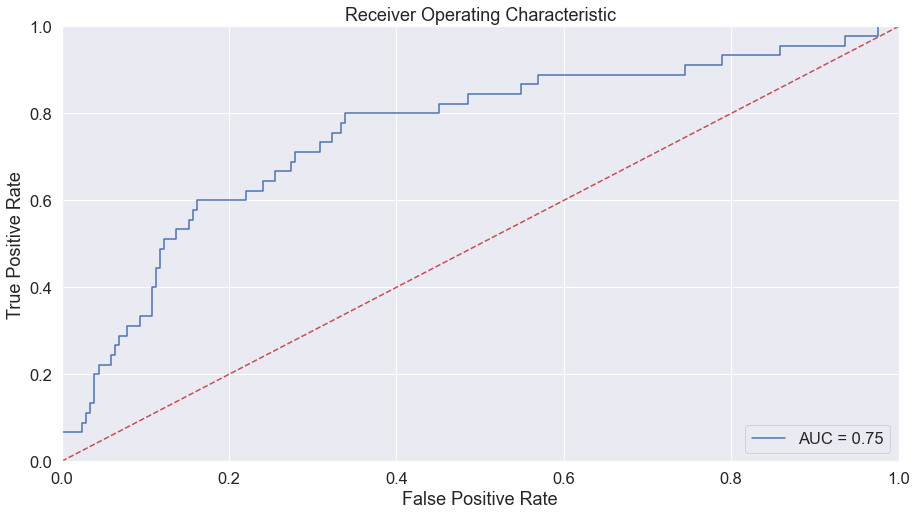

In [43]:
probs = GaussianNB_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

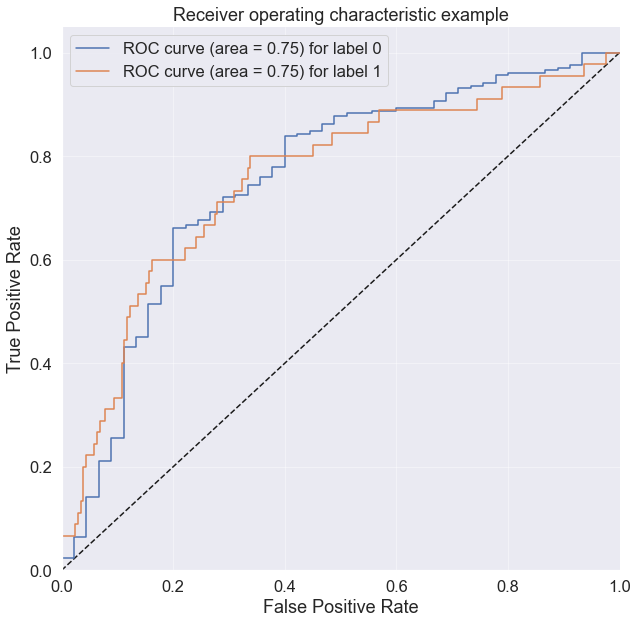

In [44]:
def plot_multiclass_roc(y_prob, X_test, y_test, n_classes, figsize=(10, 10)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(probs,X_test, y_test,2)

# Feature selection 

### Scoring argument specifies the evaluation criterion to be used. For regression problems, r2 score is the default and only implementation. But for classification, there are options for accuracy, precision, recall, f1-score, etc.

In [45]:
def get_features(results):
    max_score = max(results.avg_score)
    count = 0
    max_index = 0
    for i in results.avg_score:
        count+=1
        if (i == max_score) :
            max_index = count
            break
    return results.feature_names[max_index]
    

Forward selection — starts with one predictor and adds more iteratively. At each subsequent iteration, the best of the remaining original predictors are added based on performance criteria.
Backward elimination — starts with all predictors and eliminates one-by-one iteratively. One of the most popular algorithms is Recursive Feature Elimination (RFE) which eliminates less important predictors based on feature importance ranking.
Step-wise selection — bi-directional, based on a combination of forward selection and backward elimination. It is considered less greedy than the previous two procedures since it does reconsider adding predictors back into the model that has been removed (and vice versa). Nonetheless, the considerations are still made based on local optimisation at any given iteration.

Reference : https://towardsdatascience.com/feature-selection-for-machine-learning-in-python-wrapper-methods-2b5e27d2db31

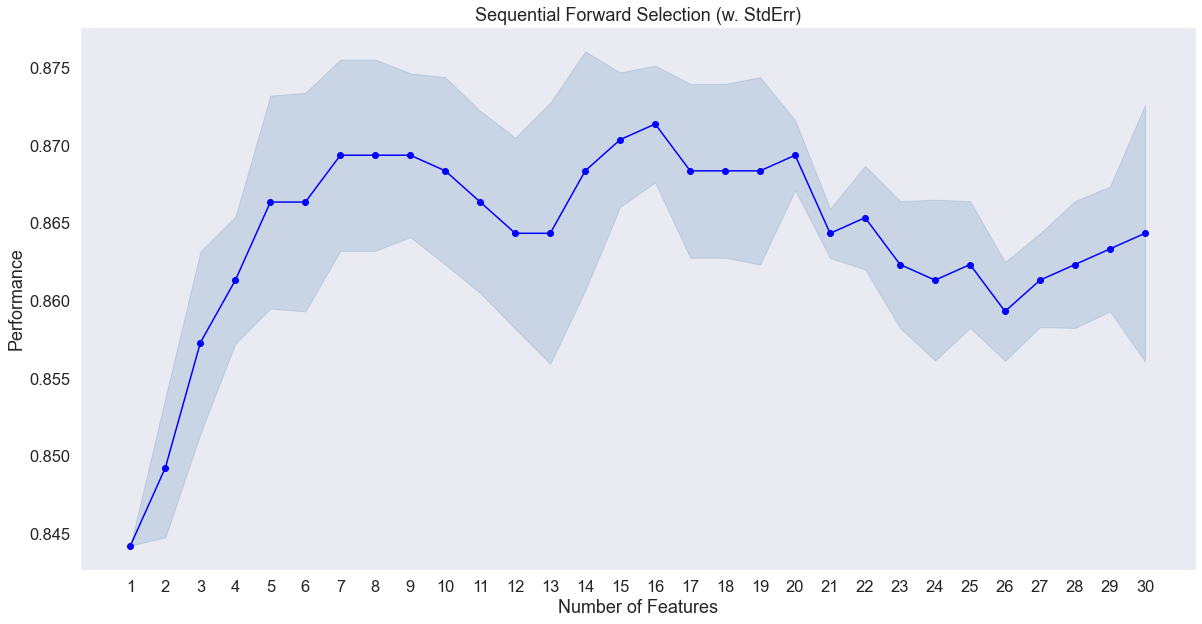

In [46]:


GaussianNB_classifier  = GaussianNB()


sfs = SFS(GaussianNB(),
           k_features=30,
           forward=True,
           floating=False,
           scoring = 'accuracy',
           cv = 5,
           n_jobs=-1
           )

sfs.fit(X_train, y_train)


df_SFS_results_forward_selection = pd.DataFrame(sfs.subsets_).transpose()

Highest_SFS_results_forward_selection = get_features(df_SFS_results_forward_selection)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(20,10))
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

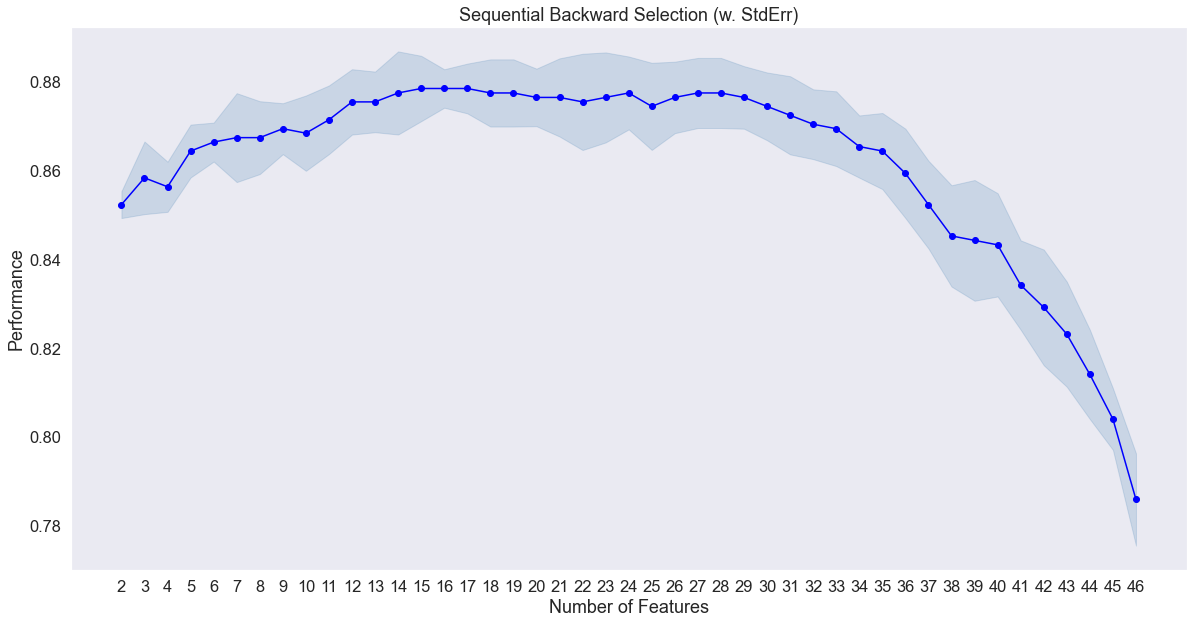

In [47]:
sfs = SFS(GaussianNB(),
           k_features=2, #here 2 is the minimum number of features it will start with 
           forward=False,
           floating=False,
           scoring = 'accuracy',
           cv = 5,
           n_jobs=-1)
#Use SFS to select the top 5 features 
sfs.fit(X_train, y_train)

#Create a dataframe for the SFS results 
df_SFS_results_backward_selection = pd.DataFrame(sfs.subsets_).transpose()
Highest_SFS_results_backward_selection = get_features(df_SFS_results_backward_selection)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(20,10))
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

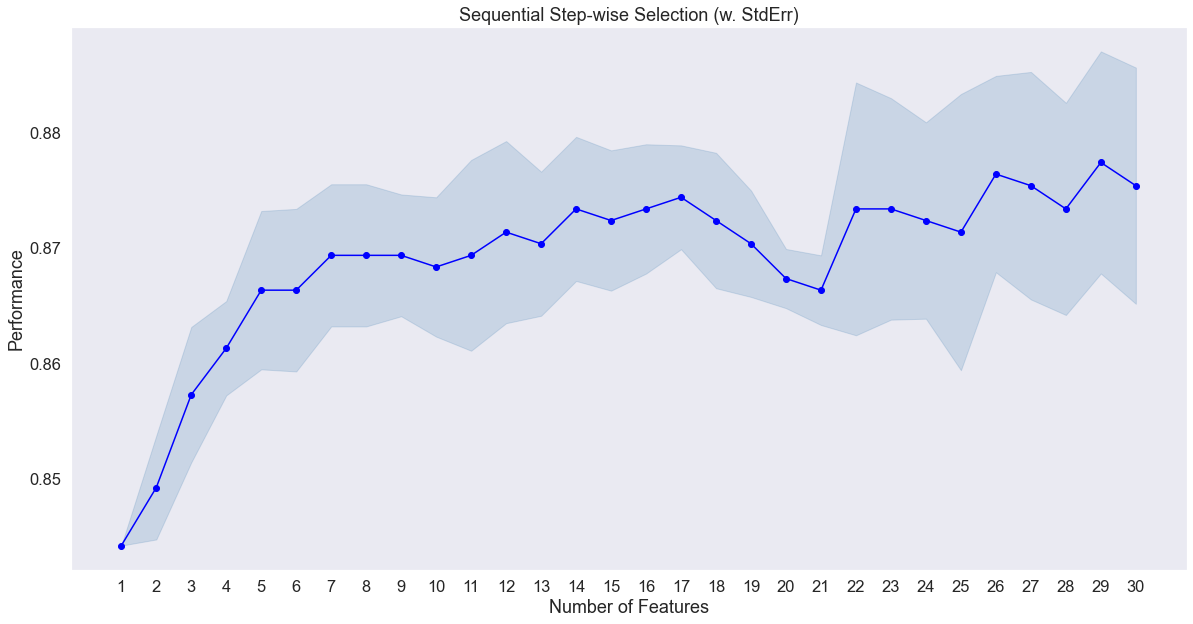

In [48]:
sfs = SFS(GaussianNB(),
           k_features=30,
           forward=True,
           floating=True,
           scoring = 'accuracy',
           cv = 5,
           n_jobs=-1)
 
sfs.fit(X_train, y_train)

#Create a dataframe for the SFS results 
df_SFS_results_BiDirectional_selection = pd.DataFrame(sfs.subsets_).transpose()
Highest_SFS_results_BiDirectional_selection = get_features(df_SFS_results_BiDirectional_selection)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(20,10))

plt.title('Sequential Step-wise Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
# df_temp = df
# for i in Highest_SFS_results_forward_selection:
#     df_temp.add(df[i])

In [ ]:

sns.heatmap(corr_matrix,annot = True,linewidths = 1 )